In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date
import calendar
from datetime import datetime

In [32]:
weather = pd.read_csv('weather.csv')
rides = pd.read_csv('cab_rides.csv')

In [33]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [5]:
rides.dropna(axis = 0, inplace = True)

In [6]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [7]:
weather.fillna(0, inplace = True)

In [8]:
weather_avg = weather.groupby('location').mean().reset_index()
weather_avg.drop(columns = 'time_stamp' , inplace = True)
weather_source = weather_avg.rename(columns =(lambda x :x + '_source'))       
weather_source.rename(columns= {'location_source' :'source'}, inplace = True)
weather_destination = weather_avg.rename(columns =(lambda x :x+'_destination'))       
weather_destination.rename(columns= {'location_destination' :'destination'} ,inplace = True)
data = rides\
       .merge(weather_source ,on ='source')\
       .merge(weather_destination ,on = 'destination')
data = data.drop('id'  , axis =1)

#binary encoding to cab_type

data['cab_type'] =data['cab_type'].replace({'Uber':1,'Lyft':0})

def one_hot_encode(df , column , prefix):
    dummy = pd.get_dummies(df[column] ,prefix = prefix)
    df = pd.concat([df , dummy] ,axis =1)
    df =df.drop(column , axis =1)
    
    return df

data = one_hot_encode(data ,column =  'destination' , prefix = 'desti')
data = one_hot_encode(data ,column =  'source' , prefix = 'src')
data = one_hot_encode(data ,column =  'product_id' , prefix = 'pid')
data = one_hot_encode(data ,column =  'name' , prefix = 'nm')

In [9]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'price', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'humidity_destination', 'wind_destination', 'desti_Back Bay',
       'desti_Beacon Hill', 'desti_Boston University', 'desti_Fenway',
       'desti_Financial District', 'desti_Haymarket Square', 'desti_North End',
       'desti_North Station', 'desti_Northeastern University',
       'desti_South Station', 'desti_Theatre District', 'desti_West End',
       'src_Back Bay', 'src_Beacon Hill', 'src_Boston University',
       'src_Fenway', 'src_Financial District', 'src_Haymarket Square',
       'src_North End', 'src_North Station', 'src_Northeastern University',
       'src_South Station', 'src_Theatre District', 'src_West End',
       'pid_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'pid_6c84fd89-3f11-478

In [20]:
x = data.drop('price', axis = 1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

sc = StandardScaler()
sc.fit(x_train)

x_train = pd.DataFrame(sc.transform(x_train) ,columns =x.columns)
x_test =  pd.DataFrame(sc.transform(x_test) ,columns = x.columns)

(446583, 64) (191393, 64) (446583,) (191393,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train, test = train_test_split(data, shuffle=True, train_size=0.7)

In [ ]:
train

In [ ]:
test

In [36]:
train.to_csv('train.csv', index=False)

In [37]:
test.to_csv('test.csv', index=False)

# DONT TOUCH ABOVE THIS

In [34]:
train = pd.read_csv('train_final_best_2.csv')
test = pd.read_csv('test_final_best_2.csv')

In [35]:
train.columns

Index(['Unnamed: 0', 'distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'time_ride',
       'date_hour', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'humidity', 'wind', 'time_weather'],
      dtype='object')

In [36]:
train.time_ride

0       2018-11-28 16:06:22.934
1       2018-11-29 02:07:18.274
2       2018-11-28 16:02:08.213
3       2018-12-01 02:53:00.951
4       2018-11-28 10:02:08.053
                 ...           
2478    2018-11-28 14:02:07.332
2479    2018-11-28 07:34:35.405
2480    2018-11-29 04:46:23.883
2481    2018-11-26 21:35:09.614
2482    2018-11-28 07:33:43.255
Name: time_ride, Length: 2483, dtype: object

In [37]:
type(train['date_hour'][0])

str

In [38]:
train['timestamp'] = train.date_hour.apply(lambda x: (datetime.strptime(x,'%Y-%m-%d:%H.%M.%S')))
test['timestamp'] = test.date_hour.apply(lambda x: (datetime.strptime(x,'%Y-%m-%d:%H.%M.%S')))

#Find hour of each trip
train['hour'] = train['timestamp'].dt.strftime('%H')
test['hour'] = test['timestamp'].dt.strftime('%H')

#Find date of each trip
train['date'] = train['timestamp'].dt.strftime('%Y-%m-%d') 
test['date'] = test['timestamp'].dt.strftime('%Y-%m-%d') 

#Find day name of each trip
train['day'] = train['timestamp'].dt.day_name()
test['day'] = test['timestamp'].dt.day_name()

# drop redundant fields 
train = train.drop('timestamp', axis=1)
test = test.drop('timestamp', axis=1)

In [39]:
train

,Unnamed: 0,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,...,location,clouds,pressure,rain,humidity,wind,time_weather,hour,date,day
0,643,0.63,Lyft,Financial District,South Station,26.0,1.0,4a180790-b8cf-46a4-a144-c0263c5a2472,lyft_luxsuv,Lux Black XL,...,South Station,0.63,991.57,0.000,0.62,10.01,2018-11-28 16:06:22.000,16,2018-11-28,Wednesday
1,1675,0.56,Uber,Haymarket Square,North Station,27.5,1.0,8fad149e-8fa2-45d0-b521-c1d9ba530d29,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,North Station,0.50,997.89,0.002,0.70,10.38,2018-11-29 02:07:18.000,02,2018-11-29,Thursday
2,1389,2.85,Uber,Beacon Hill,Haymarket Square,31.0,1.0,04c07c57-a71e-4103-9c87-9816765d68a0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,Haymarket Square,0.63,991.56,0.000,0.62,9.89,2018-11-28 16:02:08.000,16,2018-11-28,Wednesday
3,2201,1.84,Uber,North Station,South Station,27.0,1.0,0bbbd244-05e1-443b-9443-4b875140f8f0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,South Station,0.90,1018.82,0.000,0.70,3.77,2018-12-01 02:53:00.000,02,2018-12-01,Saturday
4,1036,1.73,Lyft,Haymarket Square,Theatre District,22.5,1.0,e65ac260-22c2-4691-9b01-f46a1dd816ec,lyft_lux,Lux Black,...,Theatre District,0.13,991.18,0.000,0.84,5.59,2018-11-28 10:02:08.000,10,2018-11-28,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478,92,3.22,Uber,North Station,Northeastern University,11.5,1.0,b1a35b6a-04c8-46a1-9a7b-c8c190f498e1,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,Northeastern University,0.49,991.67,0.000,0.67,11.39,2018-11-28 14:02:07.000,14,2018-11-28,Wednesday
2479,2045,1.34,Uber,Fenway,Back Bay,27.0,1.0,833cf800-ab7e-4d1d-be4f-f408b07f7a1c,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,Back Bay,0.15,991.78,0.000,0.80,6.62,2018-11-28 07:34:35.000,07,2018-11-28,Wednesday
2480,3634,2.19,Uber,North End,Beacon Hill,8.5,1.0,2f9880b8-8d6e-4f44-ba77-04d2a7344763,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,Beacon Hill,0.45,998.92,0.000,0.70,9.37,2018-11-29 04:46:23.000,04,2018-11-29,Thursday
2481,3504,1.74,Lyft,North End,Theatre District,16.5,1.0,689b9f95-60a6-4ede-b668-4baaedf83cd4,lyft_premier,Lux,...,Theatre District,0.91,1009.02,0.003,0.86,9.48,2018-11-26 21:35:09.000,21,2018-11-26,Monday


In [40]:
train['hour']=train['hour'].astype('int')

In [41]:
train['hour'].value_counts()

1     258
0     203
9     151
7     149
6     135
2     130
10    123
4     123
17    122
23    121
14    118
19    104
21    100
11     98
13     92
16     80
12     78
15     75
22     74
18     44
5      40
20     36
8      21
3       8
Name: hour, dtype: int64

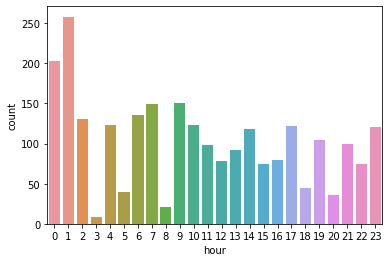

In [42]:
a=sns.countplot(x='hour', data=train)
#a.set_ylim(14000,22000)

In [25]:
def busy(x):
    if x['hour'] == 0 or x['hour']==1:
        return ('Busiest')
    if x['hour'] == 2 or x['hour']==4 or x['hour']==6 or x['hour']==7 or x['hour']==9 or x['hour']==10 or x['hour']==14 or x['hour']==17 or x['hour']==19 or x['hour']==22:
        return ('Busy')
    else:
        return ('Not Busy')

In [26]:
train['busyness'] = train.apply(lambda x: busy(x), axis=1)

In [29]:
train.loc[train['busyness'] == 'Busiest']

,Unnamed: 0,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,humidity,wind,time_weather,hour,date,day,busyness
33,3771,0.98,Lyft,Beacon Hill,Haymarket Square,34.0,1.25,ef857b8b-1e19-456c-8837-762286d842e5,lyft_luxsuv,Lux Black XL,...,0.57,997.62,0.0020,0.70,9.98,2018-11-29 01:51:40.000,1,2018-11-29,Thursday,Busiest
37,2287,1.92,Uber,Northeastern University,Beacon Hill,8.0,1.00,0ac43580-13f7-42e7-8eb9-cbbf0ef28c3b,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.71,997.13,0.0000,0.71,9.91,2018-11-29 01:02:08.000,1,2018-11-29,Thursday,Busiest
39,106,5.37,Lyft,Boston University,Financial District,45.5,1.00,9f08f989-82c1-46fe-800a-6f7d864d7d5b,lyft_luxsuv,Lux Black XL,...,0.71,997.12,0.0000,0.76,10.00,2018-11-29 01:02:08.000,1,2018-11-29,Thursday,Busiest
43,2943,3.07,Uber,North Station,Fenway,17.0,1.00,d3e8f62d-b005-4038-8746-8ccaf3a7b8c8,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.83,996.11,0.0000,0.67,10.59,2018-11-29 00:02:07.000,0,2018-11-29,Thursday,Busiest
53,885,3.20,Lyft,Fenway,North Station,16.5,1.00,bb22575a-8f6b-4e8c-bcd7-19ae1791be22,lyft_plus,Lyft XL,...,0.04,992.09,0.0000,0.73,7.52,2018-11-28 00:45:22.000,0,2018-11-28,Wednesday,Busiest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,663,1.51,Uber,North End,Beacon Hill,10.5,1.00,3f8175e7-2621-409f-b70d-21cfc0e0e95c,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.58,997.48,0.0000,0.72,10.43,2018-11-29 01:27:03.000,1,2018-11-29,Thursday,Busiest
2469,1611,0.49,Uber,North Station,Haymarket Square,7.0,1.00,225066e3-2c86-47ee-8915-9b27f33f9843,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0.98,1006.01,0.1588,0.90,9.99,2018-11-27 00:58:48.000,0,2018-11-27,Tuesday,Busiest
2470,3434,1.22,Uber,Northeastern University,Back Bay,10.5,1.00,665f55ad-2451-4f16-9b50-8a82af85ece8,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0.04,992.11,0.0000,0.72,7.46,2018-11-28 00:45:22.000,0,2018-11-28,Wednesday,Busiest
2475,2216,2.62,Uber,Boston University,Theatre District,20.5,1.00,cbc3afa1-3758-4ba4-8611-d47f2db7840d,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,0.77,996.79,0.0000,0.69,11.07,2018-11-29 00:37:34.000,0,2018-11-29,Thursday,Busiest


<AxesSubplot:xlabel='busyness', ylabel='price'>

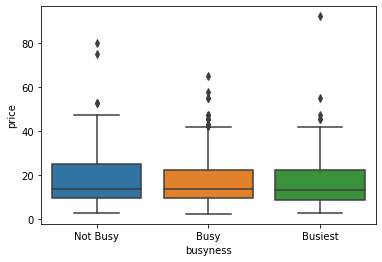

In [30]:
sns.boxplot(y='price', x='busyness', data=train)

<AxesSubplot:xlabel='day', ylabel='price'>

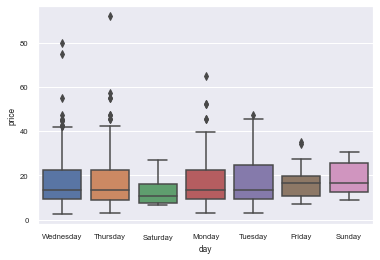

In [117]:
sns.boxplot(x='day',y='price', data=train )

<AxesSubplot:xlabel='rush_dummy', ylabel='wind'>

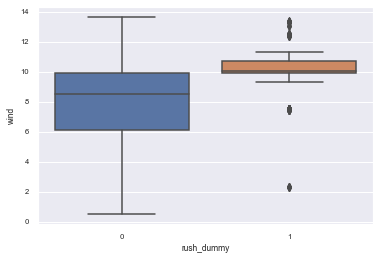

In [132]:
sns.boxplot(x='rush_dummy',y='wind', data=train )

<AxesSubplot:xlabel='day', ylabel='count'>

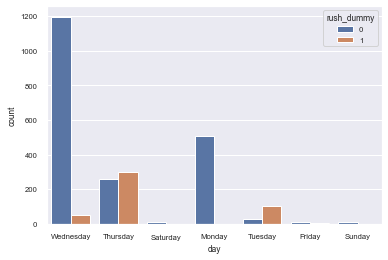

In [137]:
sns.countplot(x='day',hue='rush_dummy', data=train )

<AxesSubplot:xlabel='rush_dummy', ylabel='surge_multiplier'>

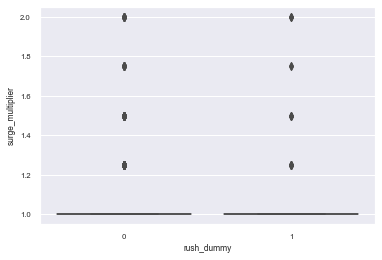

In [134]:
sns.boxplot(x='rush_dummy',y='surge_multiplier', data=train )

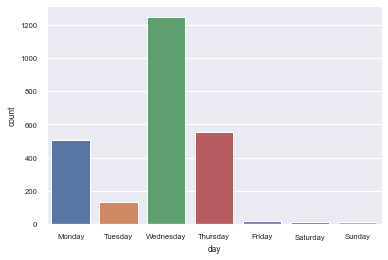

In [125]:
sns.set(font_scale=0.7)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
a=sns.countplot(x='day', data=train, order=order)

In [142]:
test.hour.value_counts()

01    121
00     89
07     69
06     68
09     66
23     54
02     52
04     52
17     51
10     50
11     44
19     44
16     43
21     38
14     37
13     34
22     34
12     28
15     24
18     20
05     20
20     15
08     10
03      2
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='price'>

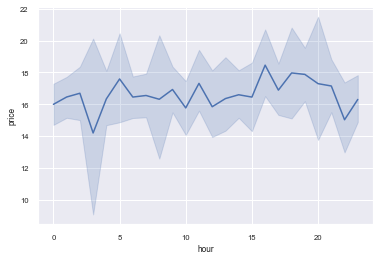

In [128]:
sns.lineplot(x='hour', y='price', data=train)

<AxesSubplot:xlabel='distance', ylabel='price'>

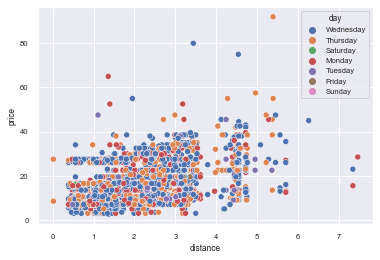

In [138]:
sns.scatterplot(x='distance',y='price', data=train, hue='day')

<AxesSubplot:xlabel='hour', ylabel='distance'>

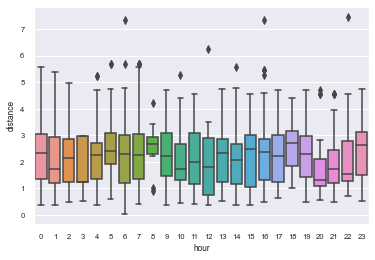

In [122]:
sns.boxplot(x='hour',y='distance', data=train )

<AxesSubplot:xlabel='day', ylabel='distance'>

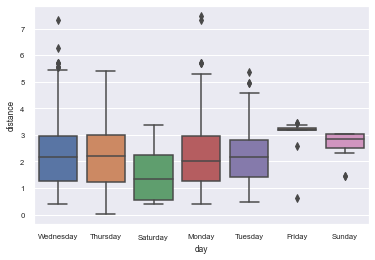

In [123]:
sns.boxplot(x='day',y='distance', data=train )

<AxesSubplot:xlabel='hour', ylabel='surge_multiplier'>

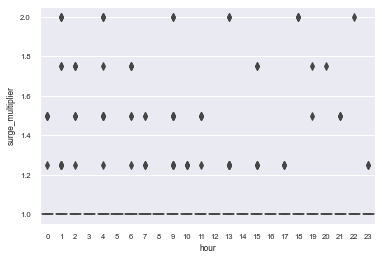

In [124]:
sns.boxplot(x='hour',y='surge_multiplier', data=train )